<a href="https://colab.research.google.com/github/Rishu-N/COMPUTER-VISION/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from zipfile import ZipFile

# specifying the zip file name
file_name = "/content/drive/MyDrive/PYTHON/archive.zip"

# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
archive/train/labels/road558_png.rf.d3997453e5619ebaadb3263d1f3e6433.txt 2023-12-07 20:04:10           79
__MACOSX/archive/train/labels/._road558_png.rf.d3997453e5619ebaadb3263d1f3e6433.txt 2023-12-07 20:04:10          212
archive/train/labels/FisheyeCamera_1_00635_png.rf.0393df5455254965dd22036c828bbb82.txt 2023-12-07 20:04:10           82
__MACOSX/archive/train/labels/._FisheyeCamera_1_00635_png.rf.0393df5455254965dd22036c828bbb82.txt 2023-12-07 20:04:10          212
archive/train/labels/001698_JPG_jpg.rf.fda0da53b098630ec023101df046bf91.txt 2023-12-07 20:04:10           80
__MACOSX/archive/train/labels/._001698_JPG_jpg.rf.fda0da53b098630ec023101df046bf91.txt 2023-12-07 20:04:10          212
archive/train/labels/000374_jpg.rf.09f0efa1a25ecc107c012105e759c92a.txt 2023-12-07 20:04:08           80
__MACOSX/archive/train/labels/._000374_jpg.rf.09f0efa1a25ecc107c012105e759c92a.txt 2023-12-07 20:04:08          212
archive/train/labels/0000

In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

## IMPORTING LIBRARIES

In [4]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import torch
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

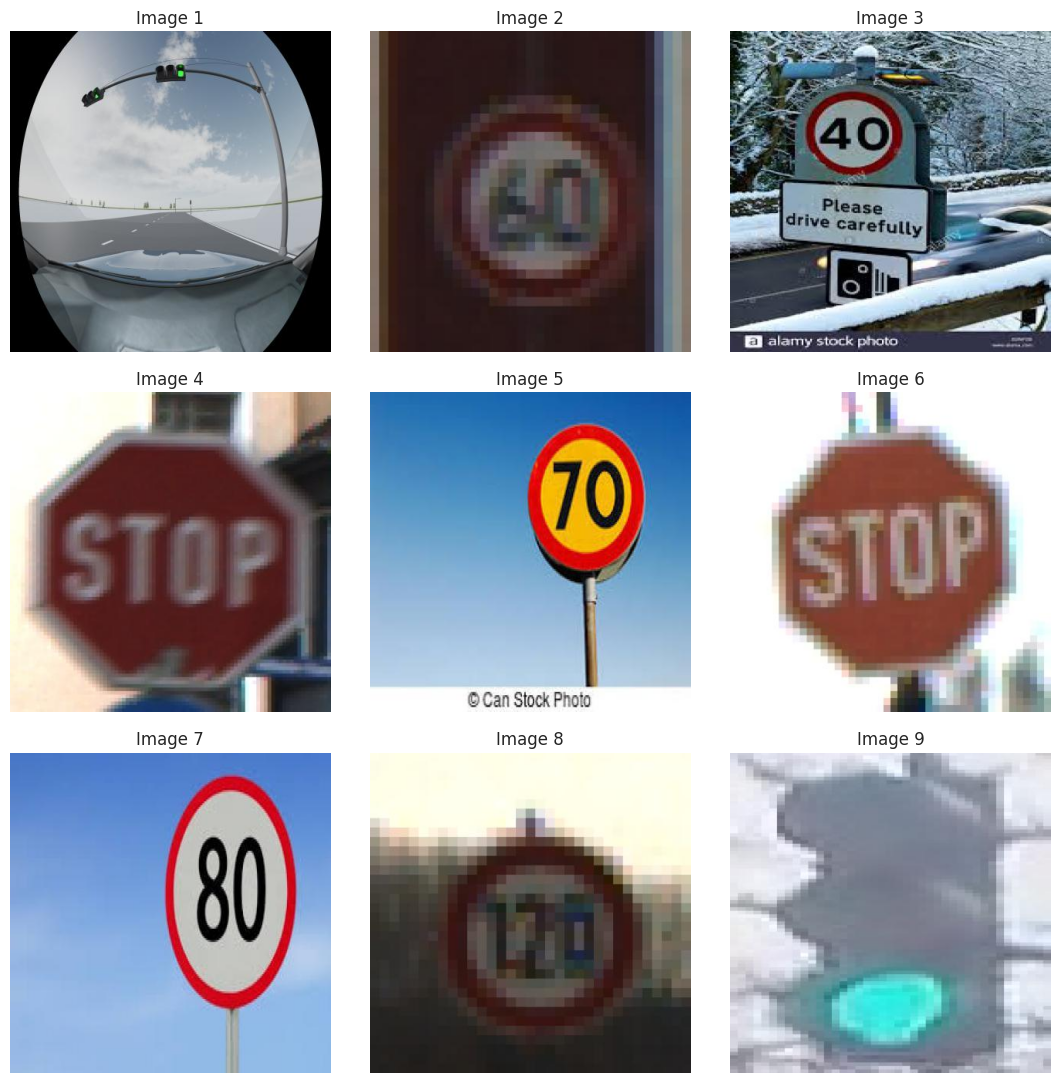

In [5]:
Image_dir = '/content/archive/train/images'

sample = 9
image_files = os.listdir(Image_dir)

import random

# Ensure image_files is not empty
if not image_files:
    print("Error: image_files is empty.")
else:
    # Determine the maximum number of samples that can be drawn
    max_samples = min(len(image_files), sample)

    # Ensure sample is non-negative and not greater than the population size
    if sample < 0:
        print("Error: Sample size cannot be negative.")
    elif sample > len(image_files):
        print("Error: Sample size is larger than the population size.")
    else:
        # Randomly select num_samples images
        rand_image = random.sample(image_files, max_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(sample):
    image = rand_image[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

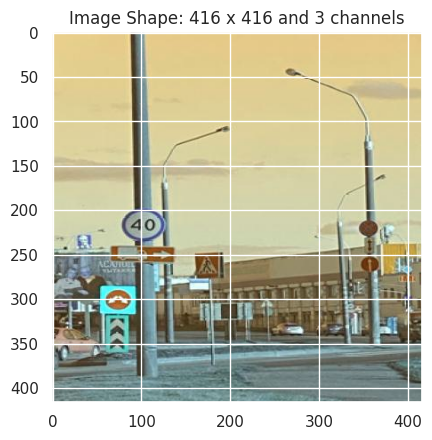

In [7]:
image = cv2.imread('/content/archive/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg')
h, w, c = image.shape
plt.imshow(image)
plt.title(f"Image Shape: {w} x {h} and 3 channels")
plt.show()

## PRETRAINED YOLO MODEL

In [9]:
model = YOLO("yolov8n.pt")
image = '/content/archive/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg'
predict = model.predict(image,imgsz=(416))


image 1/1 /content/archive/train/images/road781_png.rf.eb64c78000a704daa7e5b88e8f835873.jpg: 416x416 3 cars, 10.9ms
Speed: 5.5ms preprocess, 10.9ms inference, 1178.7ms postprocess per image at shape (1, 3, 416, 416)


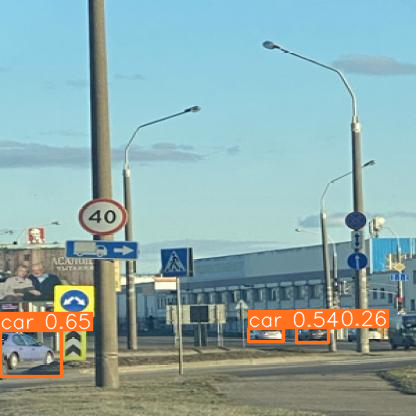

In [10]:
plot = predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## FINAL MODEL TRAINING

In [11]:
fn_model = YOLO('yolov8.yaml').load('yolov8n.pt')
result_fn = fn_model.train(data='/content/archive/data.yaml',epochs=30,
                 imgsz = 416, batch = 80 ,lr0=0.0001, dropout= 0.15, device = 0)

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8.yaml, data=/content/archive/data.yaml, epochs=30, time=None, patience=100, batch=80, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

100%|██████████| 755k/755k [00:00<00:00, 37.3MB/s]


Overriding model.yaml nc=80 with nc=15
WARNING ⚠️ no model scale passed. Assuming scale='n'.

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]      

train: Scanning /content/archive/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:06<00:00, 563.26it/s]


train: New cache created: /content/archive/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/archive/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 483.28it/s]


val: New cache created: /content/archive/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000625), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       5.3G     0.8548      3.559      1.099         22        416: 100%|██████████| 45/45 [00:42<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]

                   all        801        944     0.0609      0.738      0.125      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       4.9G     0.7148      2.397      1.019         28        416: 100%|██████████| 45/45 [00:40<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]

                   all        801        944      0.324      0.374      0.249       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.91G     0.7148      2.004      1.006         18        416: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]


                   all        801        944       0.32      0.494      0.315      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.91G      0.692      1.754     0.9846         31        416: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.19s/it]


                   all        801        944      0.433      0.549      0.489      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.91G     0.6813      1.528     0.9856         17        416: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]


                   all        801        944      0.628      0.603      0.616      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.91G     0.6555      1.364     0.9697         22        416: 100%|██████████| 45/45 [00:35<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.05it/s]

                   all        801        944      0.773      0.615      0.738      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       4.9G     0.6518      1.234     0.9688         28        416: 100%|██████████| 45/45 [00:35<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]


                   all        801        944      0.755      0.648      0.727      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.91G     0.6264      1.168     0.9572         18        416: 100%|██████████| 45/45 [00:37<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        801        944      0.812      0.723       0.79      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.91G     0.6232      1.087     0.9543         18        416: 100%|██████████| 45/45 [00:36<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]


                   all        801        944      0.859      0.727       0.82      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       4.9G     0.6054      1.014     0.9507         17        416: 100%|██████████| 45/45 [00:35<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        801        944      0.867      0.752      0.842      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.91G     0.6061     0.9745     0.9445         27        416: 100%|██████████| 45/45 [00:37<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.04it/s]

                   all        801        944      0.913      0.747      0.846      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.91G     0.6002     0.9333     0.9417         24        416: 100%|██████████| 45/45 [00:35<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.08s/it]

                   all        801        944       0.92      0.773      0.861      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.91G     0.5925     0.8835     0.9413         26        416: 100%|██████████| 45/45 [00:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        801        944       0.86      0.798      0.858      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.91G     0.5812     0.8665     0.9379         20        416: 100%|██████████| 45/45 [00:36<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

                   all        801        944       0.89      0.779      0.862      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.91G     0.5658     0.8201      0.934         22        416: 100%|██████████| 45/45 [00:34<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.06s/it]

                   all        801        944      0.903      0.776      0.872      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.91G     0.5661     0.8185     0.9341         19        416: 100%|██████████| 45/45 [00:35<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.02s/it]

                   all        801        944      0.883      0.801      0.871      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       4.9G     0.5574     0.7769     0.9312         19        416: 100%|██████████| 45/45 [00:34<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:08<00:00,  1.43s/it]

                   all        801        944      0.925      0.822      0.883      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.88G     0.5632     0.7704     0.9291         22        416: 100%|██████████| 45/45 [00:35<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]

                   all        801        944      0.906       0.82      0.889      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.91G     0.5514     0.7107     0.9258         22        416: 100%|██████████| 45/45 [00:34<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]

                   all        801        944      0.943        0.8      0.883      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       4.9G     0.5402     0.7201     0.9243         22        416: 100%|██████████| 45/45 [00:36<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.14s/it]

                   all        801        944      0.935      0.818      0.892      0.773


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.88G     0.5441     0.5668     0.8748         11        416: 100%|██████████| 45/45 [00:39<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.18it/s]

                   all        801        944      0.936      0.804      0.896      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.88G     0.5277     0.5178     0.8761         18        416: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.07it/s]

                   all        801        944      0.918      0.831      0.896      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.88G     0.5188     0.4794     0.8706          9        416: 100%|██████████| 45/45 [00:32<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.16s/it]

                   all        801        944      0.936      0.818      0.896      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.88G     0.5197     0.4645     0.8732         10        416: 100%|██████████| 45/45 [00:33<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]

                   all        801        944      0.956      0.827      0.902      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.91G      0.503     0.4418     0.8671         12        416: 100%|██████████| 45/45 [00:33<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]

                   all        801        944      0.946      0.837      0.909      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.91G     0.5006     0.4298     0.8621         10        416: 100%|██████████| 45/45 [00:33<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.08it/s]

                   all        801        944      0.951      0.833      0.913      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.88G     0.4905     0.4086     0.8592         14        416: 100%|██████████| 45/45 [00:32<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.12s/it]

                   all        801        944      0.905      0.861      0.909      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.88G     0.4857     0.3987     0.8603         10        416: 100%|██████████| 45/45 [00:34<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]


                   all        801        944      0.959      0.839      0.914      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.88G     0.4799      0.388      0.859         12        416: 100%|██████████| 45/45 [00:32<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944      0.937      0.858       0.92      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.88G     0.4681     0.3678     0.8527         12        416: 100%|██████████| 45/45 [00:32<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.10it/s]

                   all        801        944      0.956      0.851      0.923      0.808



30 epochs completed in 0.359 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]


                   all        801        944      0.956       0.85      0.922      0.808
           Green Light        801        122      0.856      0.584      0.724      0.425
             Red Light        801        108      0.835      0.556      0.709      0.429
       Speed Limit 100        801         52      0.989      0.923      0.982      0.895
       Speed Limit 110        801         17          1      0.929      0.985      0.909
       Speed Limit 120        801         60      0.971        0.9       0.99      0.912
        Speed Limit 20        801         56      0.993      0.946      0.985      0.884
        Speed Limit 30        801         74      0.975      0.946       0.97      0.906
        Speed Limit 40        801         55      0.981      0.924      0.984      0.873
        Speed Limit 50        801         71      0.967      0.831      0.945      0.847
        Speed Limit 60        801         76      0.967      0.908      0.946      0.876
        Speed Limit 7

## METRICS EVALUATION and VISULAIZATION

In [12]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

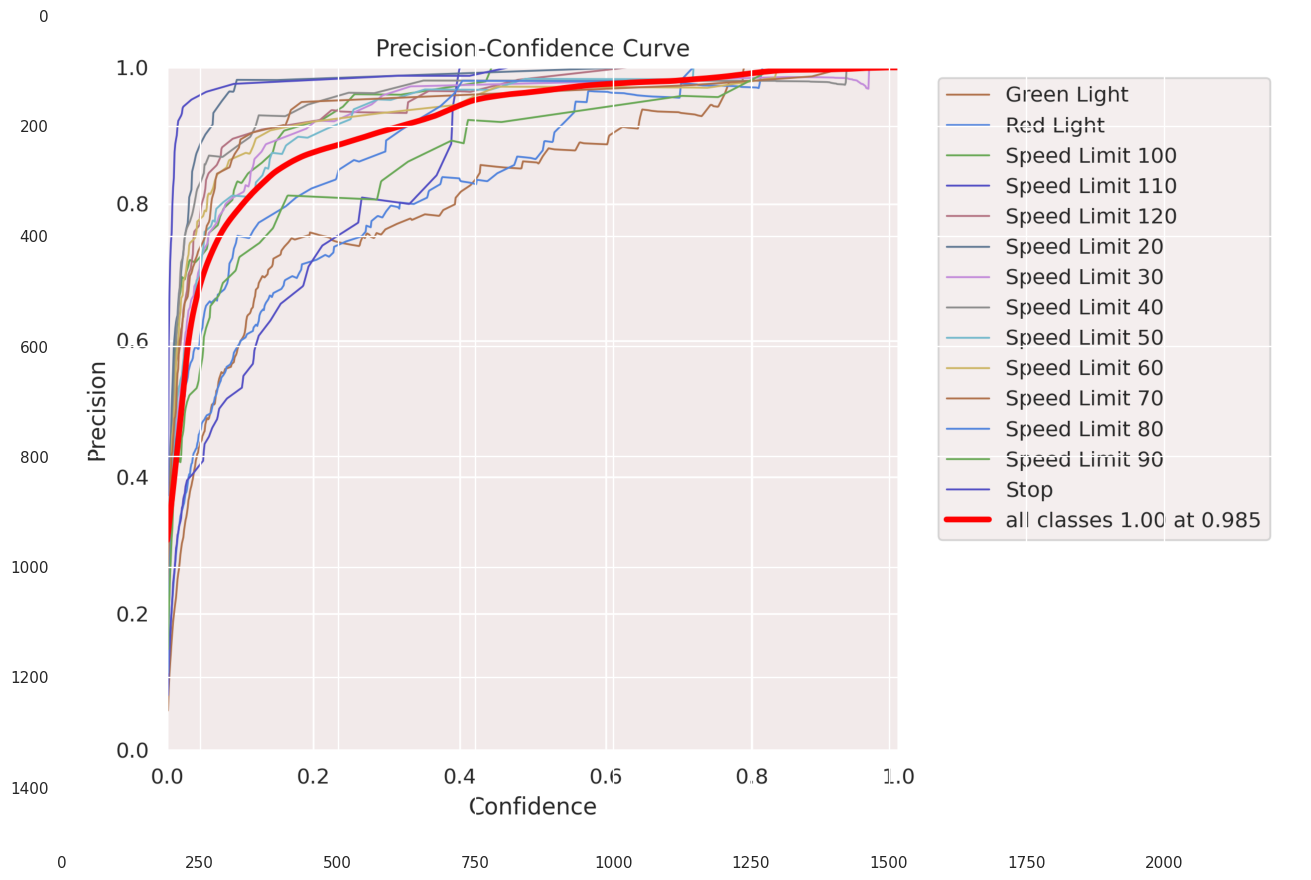

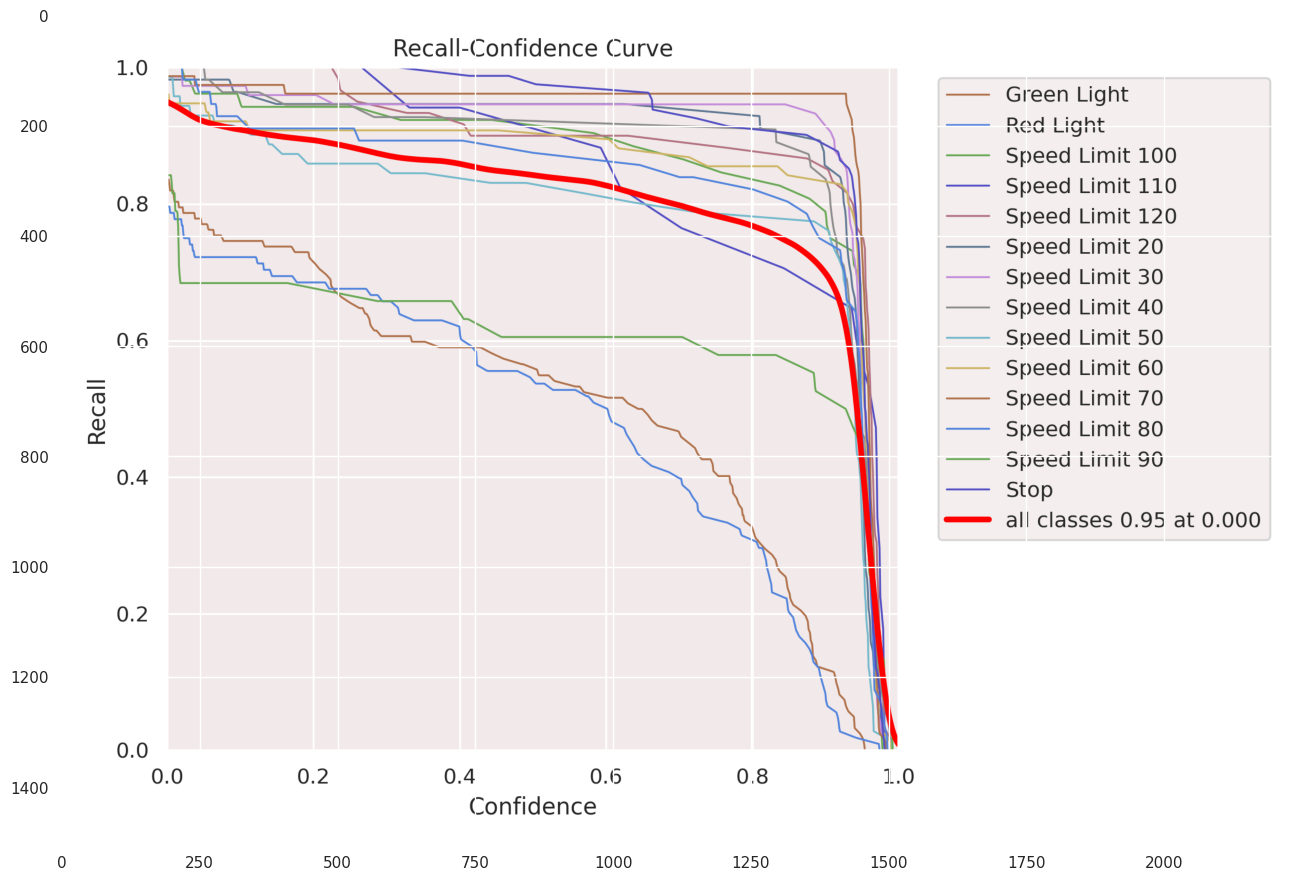

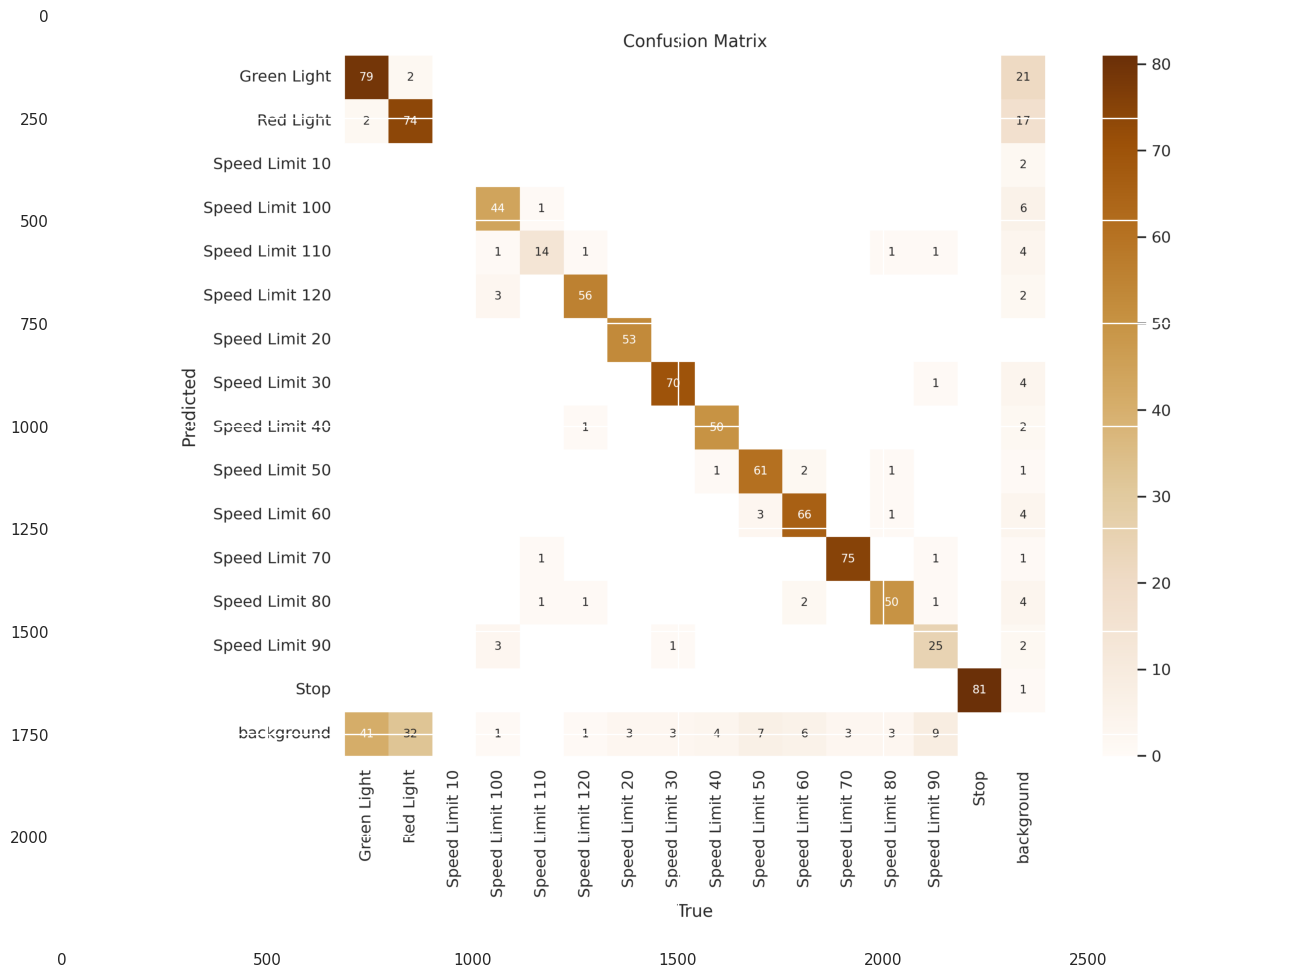

In [18]:
for i in list_of_metrics:

    image = cv2.imread(f'/content/runs/detect/train/{i}')
    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()

## RESULTS

In [20]:
Result = pd.read_csv('/content/runs/detect/train/results.csv')
Result.head(5)

epoch           train/box_loss           train/cls_loss  \
0                        1                  0.85478                   3.5586   
1                        2                  0.71482                   2.3967   
2                        3                  0.71476                   2.0041   
3                        4                  0.69196                   1.7536   
4                        5                  0.68133                   1.5280   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                  1.09930                  0.06088                  0.73821   
1                  1.01890                  0.32408                  0.37393   
2                  1.00560                  0.32030                  0.49375   
3                  0.98459                  0.43340                  0.54871   
4                  0.98556                  0.62784                  0.60294   

          metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
0                  0.12541                  0.11077                  0.63836   
1                  0.24943                  0.21026                  0.64625   
2                  0.31536                  0.26157                  0.74014   
3                  0.48892                  0.40167                  0.66836   
4                  0.61605                  0.49199                  0.72003   

              val/cls_loss             val/dfl_loss                   lr/pg0  \
0                   3.3037                  0.91953                 0.000171   
1                   2.3704                  0.93812                 0.000335   
2                   2.2294                  0.96838                 0.000488   
3                   1.5925                  0.93319                 0.000474   
4                   1.2980                  0.97968                 0.000474   

                    lr/pg1                   lr/pg2  
0                 0.000171                 0.000171  
1                 0.000335                 0.000335  
2                 0.000488                 0.000488  
3                 0.000474                 0.000474  
4                 0.000474                 0.000474

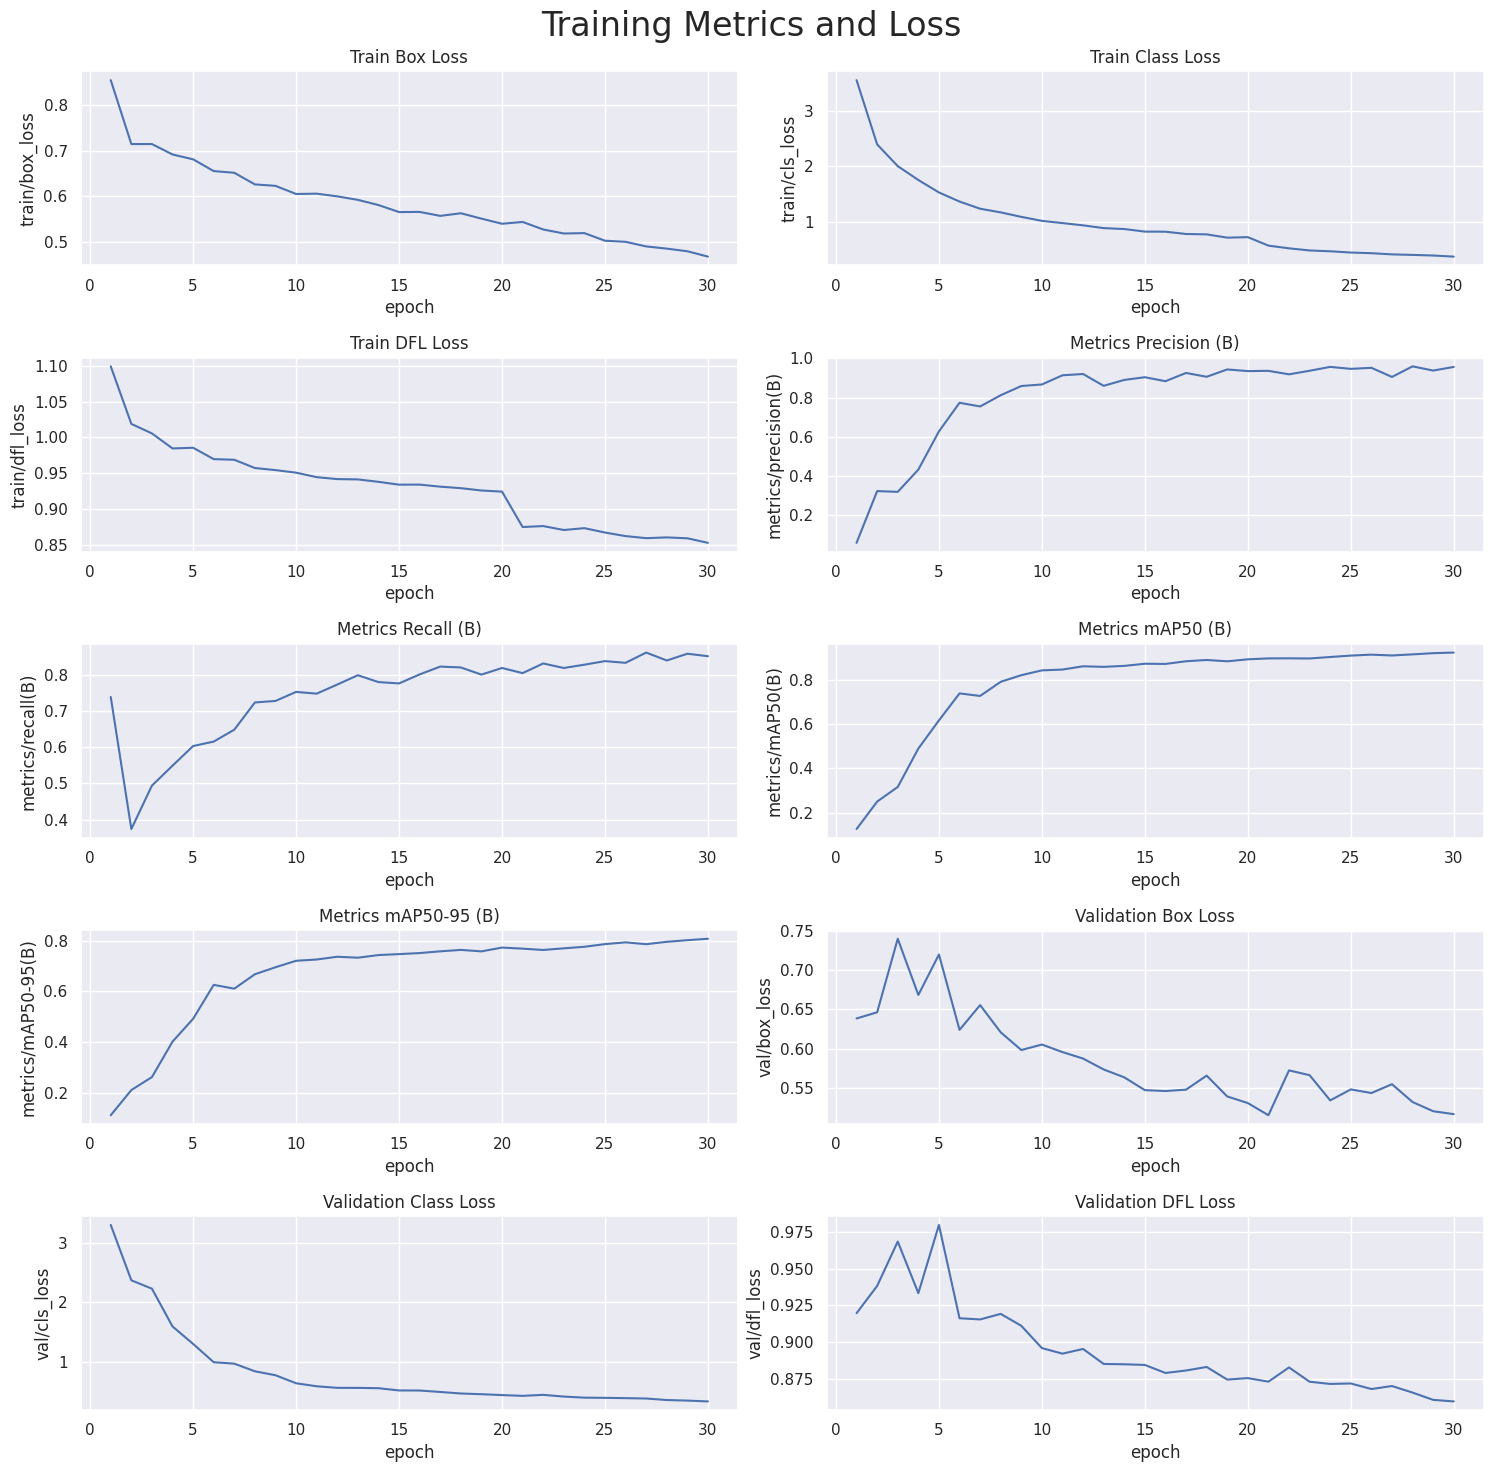

In [21]:
df = Result.copy(deep=True)

df.columns = Result.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

## TEST DATA

In [23]:
Valid_model  = YOLO('/content/runs/detect/train/weights/best.pt')
metric = Valid_model.val(split = 'test')

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8 summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/archive/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:01<00:00, 467.78it/s]

val: New cache created: /content/archive/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:09<00:00,  4.13it/s]


                   all        638        770      0.932      0.816      0.906      0.781
           Green Light        638        110      0.934      0.646      0.817      0.492
             Red Light        638         94      0.811      0.553      0.669      0.438
        Speed Limit 10        638          3        0.9      0.667      0.863      0.688
       Speed Limit 100        638         46          1      0.843      0.971      0.849
       Speed Limit 110        638         21      0.973      0.714      0.841       0.75
       Speed Limit 120        638         44      0.897      0.994      0.983      0.897
        Speed Limit 20        638         46      0.954      0.913      0.971      0.875
        Speed Limit 30        638         60      0.972      0.817      0.901      0.838
        Speed Limit 40        638         53      0.945      0.981      0.987      0.872
        Speed Limit 50        638         50      0.896       0.76      0.877      0.806
        Speed Limit 6

In [24]:
# final results of test data

precision = round(metric.results_dict["metrics/precision(B)"] * 100, 2)
recall = round(metric.results_dict["metrics/recall(B)"] * 100, 2)
mAP50 = round(metric.results_dict["metrics/mAP50(B)"] * 100, 2)
mAP50_95 = round(metric.results_dict["metrics/mAP50-95(B)"] * 100, 2)

In [25]:
table = [["Precision", precision],
         ["Recall", recall],
         ["mAP50", mAP50],
         ["mAP50-95", mAP50_95]]

# Printing the table
print('\033[1mMetrics of Test Data:\033[0m \n',tabulate(table, headers=["Metric", "Value"]))

Metrics of Test Data: 
 Metric       Value
---------  -------
Precision    93.24
Recall       81.62
mAP50        90.64
mAP50-95     78.15


## VALIDATING THE MODEL WITH VALIDATION DATA

In [27]:
image_dir = '/content/archive/valid/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

random_image = random.sample(image_files,16)

In [28]:
for img in random_image:
    image = cv2.imread(img)
    results = fn_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x416 1 Speed Limit 120, 34.5ms
Speed: 2.0ms preprocess, 34.5ms inference, 11.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Speed Limit 20, 53.5ms
Speed: 2.1ms preprocess, 53.5ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Green Light, 41.8ms
Speed: 10.7ms preprocess, 41.8ms inference, 3.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 1 Speed Limit 50, 43.8ms
Speed: 1.2ms preprocess, 43.8ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Speed Limit 120, 20.9ms
Speed: 1.4ms preprocess, 20.9ms inference, 2.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 (no detections), 37.9ms
Speed: 1.1ms preprocess, 37.9ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to

## PLOTTING RESULTS

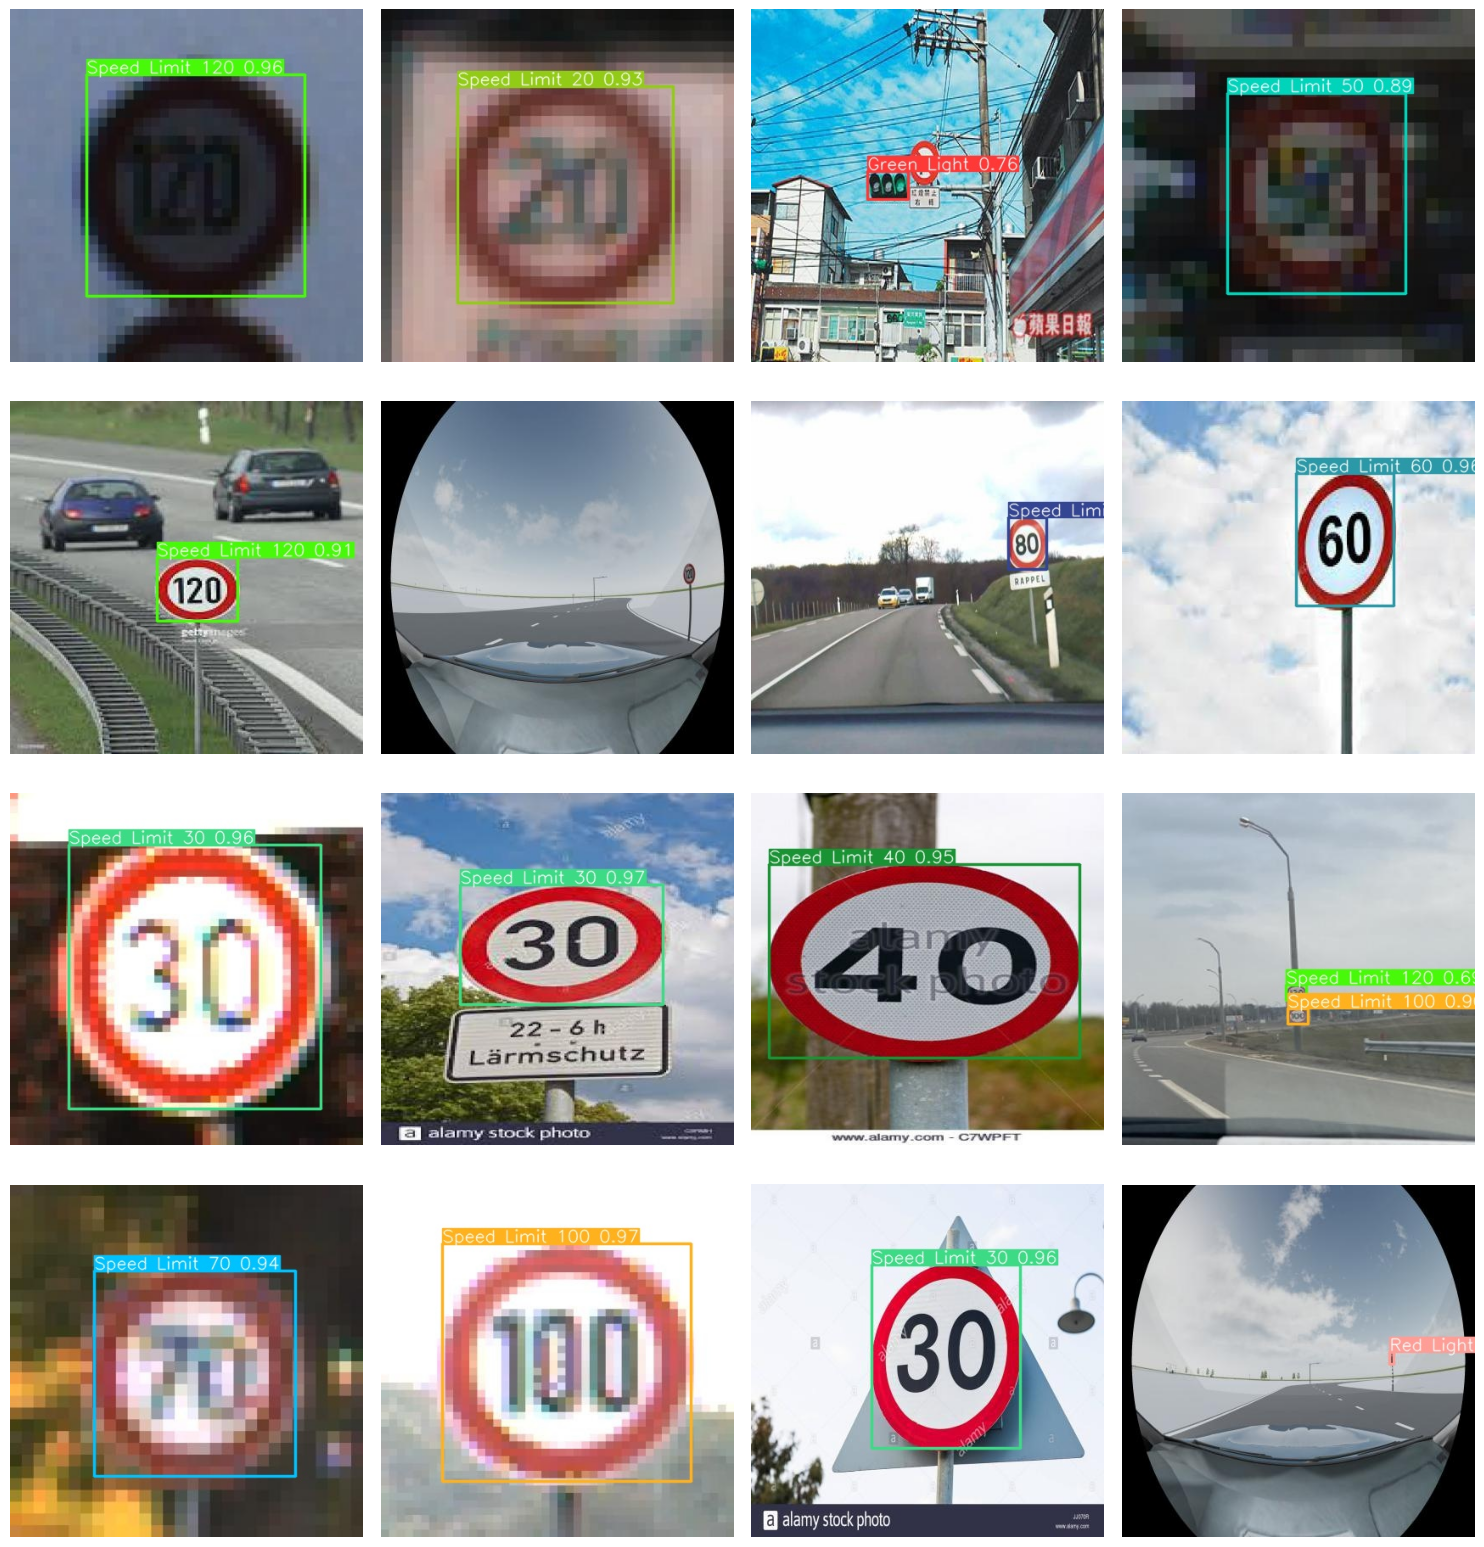

In [29]:
num_images = len(random_image)
num_cols = 4
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(15, 4 * num_rows))  # Adjust the figure size according to the number of rows

for i in range(2, 18):
    plt.subplot(num_rows, num_cols, i-1)
    plt.imshow(plt.imread(f"/content/runs/detect/train{i}/image0.jpg"))
    plt.axis('off')
plt.tight_layout()
plt.show()